In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy 
numpy.__version__ 
'1.21.4' 


'1.21.4'

In [2]:

# Load the credit dataset (assuming you have a CSV file)
credit_data_og = pd.read_csv("C:/Users/lukeh/OneDrive/Desktop/Grad School/MS_Data_Science_Drexel/kaggle_credit_risk/loan/loan.csv")


C:\Users\lukeh\AppData\Local\Temp\ipykernel_23980\3942699870.py:2: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  credit_data_og = pd.read_csv("C:/Users/lukeh/OneDrive/Desktop/Grad School/MS_Data_Science_Drexel/kaggle_credit_risk/loan/loan.csv")


In [3]:
credit_data_og.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [4]:
credit_data=credit_data_og[['loan_status','loan_amnt','term','int_rate','installment','grade', 'emp_length', 'home_ownership','annual_inc','verification_status','purpose']]

#Dropping rows with missing data
credit_data=credit_data.dropna()
#one hot coding categorical data
credit_data=pd.get_dummies(credit_data, columns = ['grade','home_ownership', 'emp_length','verification_status', 'purpose'])

# binary classification

# Define the label mapping using a dictionary
label_mapping = {
    'Fully Paid': 0,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Current': 0,
    'Late (31-120 days)': 1,
    'Late (16-30 days)': 1,
    'In Grace Period': 1,
    'Charged Off': 1,
    'Default': 1,
    'Does not meet the credit policy. Status:Charged Off': 1
}

# Apply the label mapping to the 'loan_status' column
credit_data['label'] = credit_data['loan_status'].map(label_mapping)


credit_data = credit_data.drop('loan_status', axis=1)

credit_data['term'] = credit_data['term'].str.extract('(\d+)').astype(int)


In [5]:
credit_data=credit_data.dropna()

In [6]:
# Separate features (X) and the target variable (y)
X = credit_data.loc[:, credit_data.columns != 'label']
y = credit_data['label']

In [7]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [8]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[154048    113]
 [ 12755     29]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    154161
         1.0       0.20      0.00      0.00     12784

    accuracy                           0.92    166945
   macro avg       0.56      0.50      0.48    166945
weighted avg       0.87      0.92      0.89    166945



In [9]:
# Define the label mapping using a dictionary
label_mapping = {
    'Fully Paid': 0,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Current': 0,
    'Late (31-120 days)': 1,
    'Late (16-30 days)': 1,
    'In Grace Period': 1,
    'Charged Off': 1,
    'Default': 1,
    'Does not meet the credit policy. Status:Charged Off': 1
}

# Apply the label mapping to the 'loan_status' column
credit_data_og['loan_status'] = credit_data_og['loan_status'].map(label_mapping)


In [10]:
# Recoding some of the baseline columns

credit_data_new=credit_data_og[['loan_status','loan_amnt','term','int_rate','installment','grade', 'emp_length', 'home_ownership','annual_inc','verification_status','purpose']]
credit_data_new=pd.get_dummies(credit_data_new, columns=['emp_length','verification_status', 'purpose'])


# Define the label mapping using a dictionary
col_labels ={ 'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}
# Apply the label mapping to the 'loan_status' column
credit_data_new['grade'] = credit_data_new['grade'].map(col_labels)

#Recoding Home Ownership
home_label={'ANY':0,'NONE':0,'OTHER':0, 'MORTGAGE':1,'OWN':1, 'RENT':2}
credit_data_new['home_ownership']=credit_data_new['home_ownership'].map(home_label)
# Recoding Term to remove 'months'
credit_data_new['term'] = credit_data_new['term'].str.extract('(\d+)').astype(int)

In [11]:

# Converting T/F Classes to Binary
credit_data_new[['emp_length_1 year',
       'emp_length_10+ years', 'emp_length_2 years', 'emp_length_3 years',
       'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years',
       'emp_length_7 years', 'emp_length_8 years', 'emp_length_9 years',
       'emp_length_< 1 year', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding']]=credit_data_new[['emp_length_1 year',
       'emp_length_10+ years', 'emp_length_2 years', 'emp_length_3 years',
       'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years',
       'emp_length_7 years', 'emp_length_8 years', 'emp_length_9 years',
       'emp_length_< 1 year', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding']].astype(int)

credit_data_new.head()

,loan_status,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,emp_length_1 year,emp_length_10+ years,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0.0,5000.0,36,10.65,162.87,2,2,24000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2500.0,60,15.27,59.83,3,2,30000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,2400.0,36,15.96,84.33,3,2,12252.0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.0,10000.0,36,13.49,339.31,3,2,49200.0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.0,3000.0,60,12.69,67.79,2,2,80000.0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
# Dropping NAN observations
credit_data_new=credit_data_new.dropna()
credit_data_new=credit_data_new.reset_index()
credit_data_new=credit_data_new.drop('index', axis=1)

# Removing names with ' ' or invalid characters
credit_data_new.columns=credit_data_new.columns.str.replace(' ', '')
credit_data_new.columns=credit_data_new.columns.str.replace('+', '')
credit_data_new.rename(columns={'emp_length_<1year':'emp_length_under1year'}, inplace=True)

In [13]:
credit_data_new.isnull().sum()

loan_status                           0
loan_amnt                             0
term                                  0
int_rate                              0
installment                           0
grade                                 0
home_ownership                        0
annual_inc                            0
emp_length_1year                      0
emp_length_10years                    0
emp_length_2years                     0
emp_length_3years                     0
emp_length_4years                     0
emp_length_5years                     0
emp_length_6years                     0
emp_length_7years                     0
emp_length_8years                     0
emp_length_9years                     0
emp_length_under1year                 0
verification_status_NotVerified       0
verification_status_SourceVerified    0
verification_status_Verified          0
purpose_car                           0
purpose_credit_card                   0
purpose_debt_consolidation            0


c:\Users\lukeh\anaconda3\envs\gradschool\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lukeh\anaconda3\envs\gradschool\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lukeh\anaconda3\envs\gradschool\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lukeh\anaconda3\envs\gradschool\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of

Text(0.5, 1.0, 'Inertias v.s. N_Clusters')

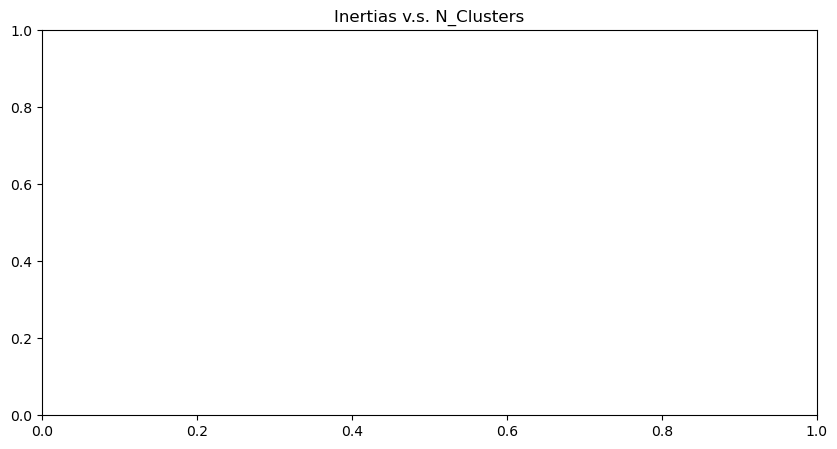

In [14]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(credit_data_new)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('Inertias v.s. N_Clusters')




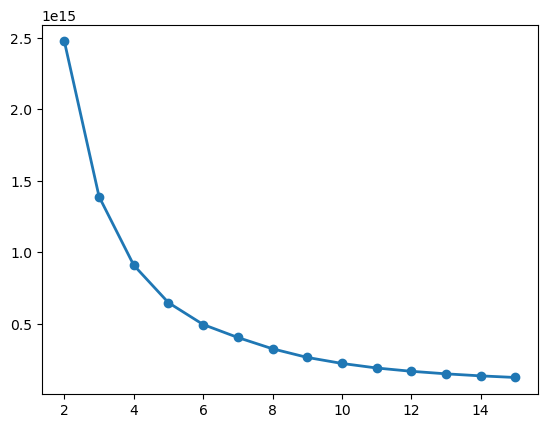

In [15]:
plt.plot(numpy.arange(2,16),inertias, marker='o', lw=2)

In [16]:
# Trying KNN Matching
from sklearn.neighbors import KNeighborsClassifier
X = credit_data_new.loc[:, credit_data_new.columns != 'loan_status']
y = credit_data_new['loan_status']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train,y_train)



KNeighborsClassifier(n_neighbors=31)

In [18]:
from sklearn.model_selection import cross_val_score


k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train.values, y_train.values, cv=5)
    scores.append(numpy.mean(score))

AttributeError: module 'matplotlib' has no attribute 'xlabel'

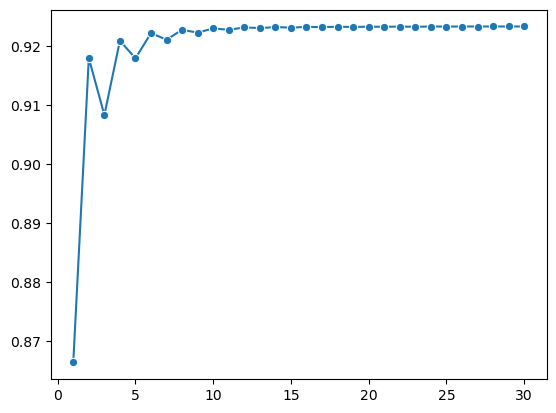

In [20]:
import seaborn as sns
import matplotlib as plt

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [23]:
#Selecting the best K value
best_index = numpy.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [25]:
from sklearn.metrics import f1_score, accuracy_score,precision_score,recall_score

y_pred = knn.predict(X_test.values)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

c:\Users\lukeh\anaconda3\envs\gradschool\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9217614900189438
Precision: 0.15774647887323945
Recall: 0.004145077720207254


In [ ]:
# Trying with a Boosted Decision Tree model

import xgboost as xgb

X = credit_data_new.loc[:, credit_data_new.columns != 'loan_status']
y = credit_data_new['loan_status']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Set the feature names for the data
feature_names = X_train.columns.tolist()

# Create DMatrix for training
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)

# Creating an XGBoost model and using DMatrix for training
model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    learning_rate=0.1,
    n_estimators=100,  # Number of boosting rounds
    max_depth=3,  # Maximum depth of each tree
    feature_names=feature_names  # Set feature names here
)

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
predictions_prob = model.predict_proba(X_test)  # Predicted probabilities
predictions = (predictions_prob[:, 1] > 0.5).astype(int)  # Convert to binary labels using threshold

# Calculate precision, recall, and F1 score for each label
precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average=None)

for label, prec, rec, f in zip(range(2), precision, recall, f1):
    print(f"Label: {label}")
    print(f"Precision: {prec:.2f}, Recall: {rec:.2f}, F1 Score: {f:.2f}")
    print("=" * 20)

# Very accurately predicting O, terribly predicting 1